In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [98]:
df = df.drop('CustomerID', axis=1)

In [9]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


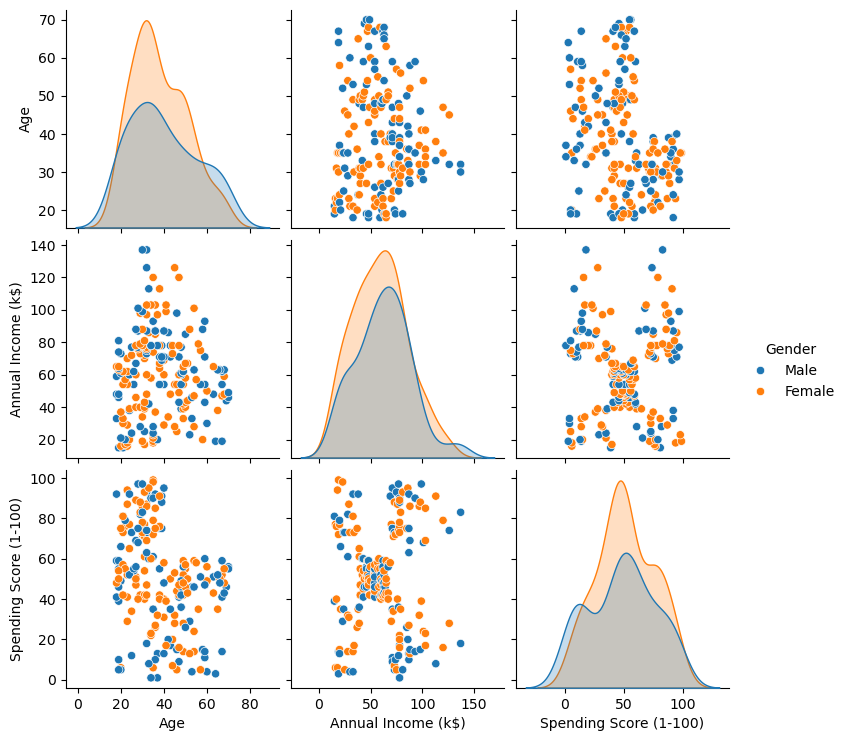

In [11]:
sns.pairplot(df, hue='Gender')

<Axes: >

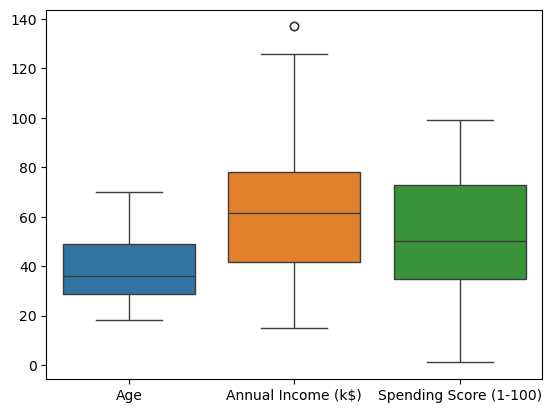

In [8]:
sns.boxplot(df)

In [99]:
df['Gender'] = (df['Gender'] == 'Male').astype(int)

In [100]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

inertias = []
silhouettes = []
k_clusters = np.arange(2, int(df.shape[0] ** 0.5) + 1, 1)
for k in k_clusters:
    kmeans = KMeans(k, random_state=1)
    labels = kmeans.fit_predict(df)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, labels))

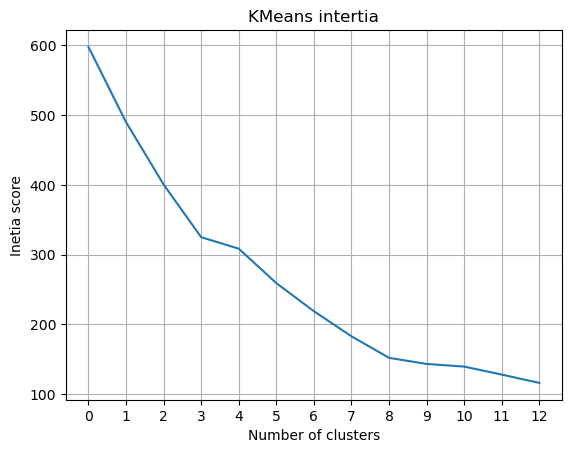

In [101]:
plt.title('KMeans intertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inetia score')
plt.grid(True)
plt.xticks(np.arange(len(inertias)))
plt.plot(inertias)

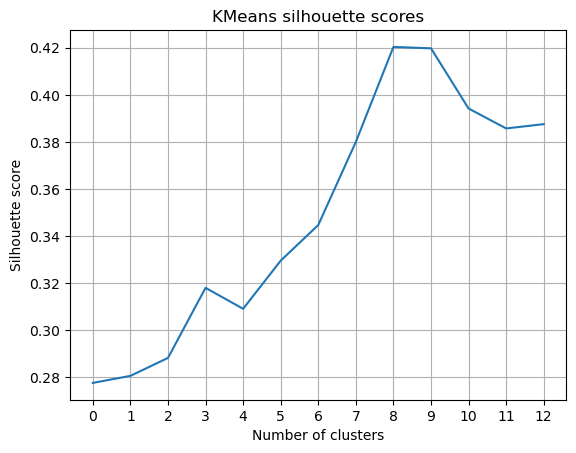

In [102]:
plt.title('KMeans silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.xticks(np.arange(len(silhouettes)))
plt.plot(silhouettes)

<Axes: >

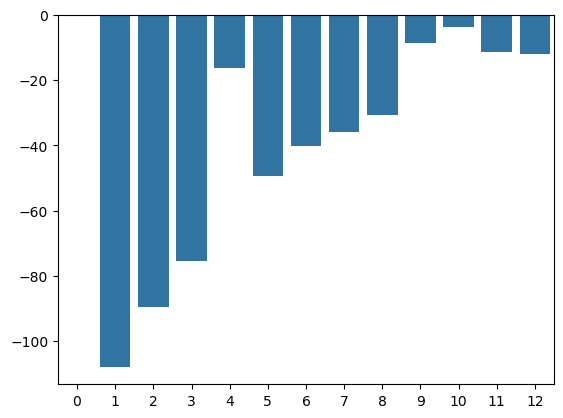

In [103]:
sns.barplot(pd.Series(inertias).diff())

In [106]:
kmeans = KMeans(n_clusters=9, random_state=1)
df['Cluster'] = kmeans.fit_predict(df)
# sns.pairplot(df.drop(['Gender'], axis=1), hue='Cluster')

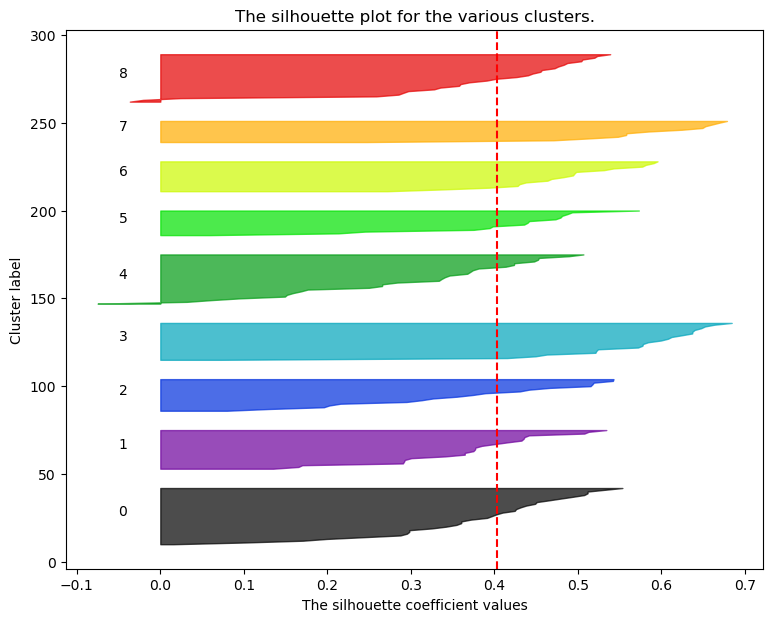

In [107]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9, 7)

X, cluster_labels = df.drop('Cluster', axis=1), df['Cluster']
n_clusters = 9

silhouette_per_sample = silhouette_samples(X, cluster_labels)
average_silhouette = silhouette_score(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = silhouette_per_sample[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=average_silhouette, color="red", linestyle="--")
plt.show()